# Decision Tree Module
In this module, we introduce the decision tree model: a greedy, recursive algorithm that partitions our feature space 

talk about robustness and variance of trees

talk about pruning and cut off criteria

structure of model depends on data, unlike other models

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
from sklearn.datasets import make_circles
import numpy as np
from utils import view_boundary

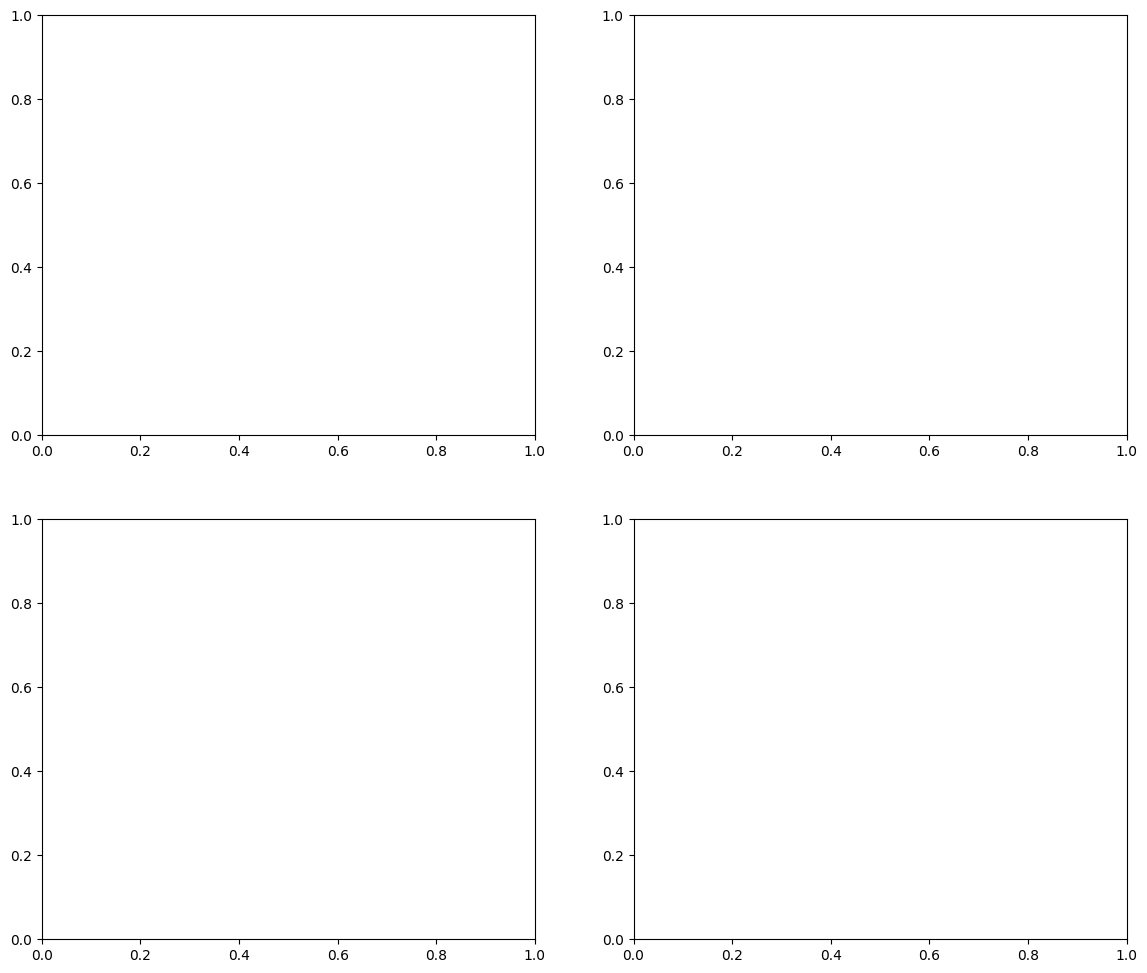

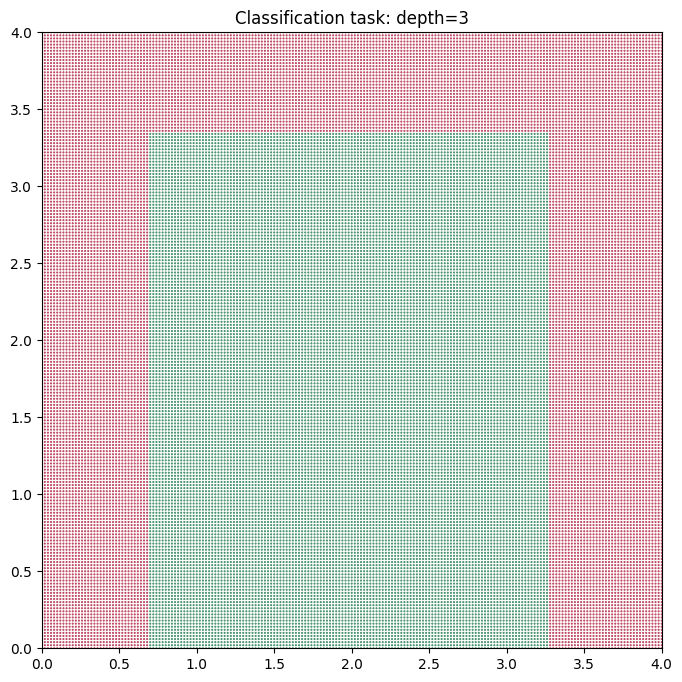

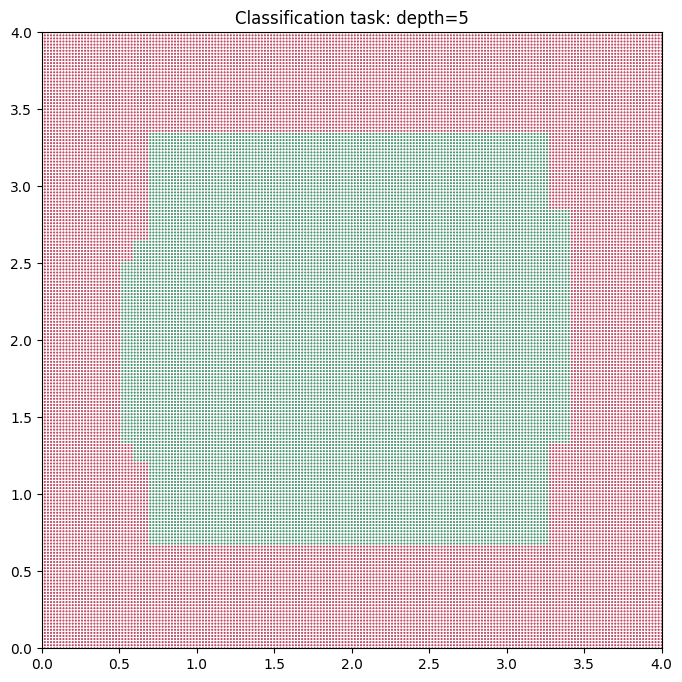

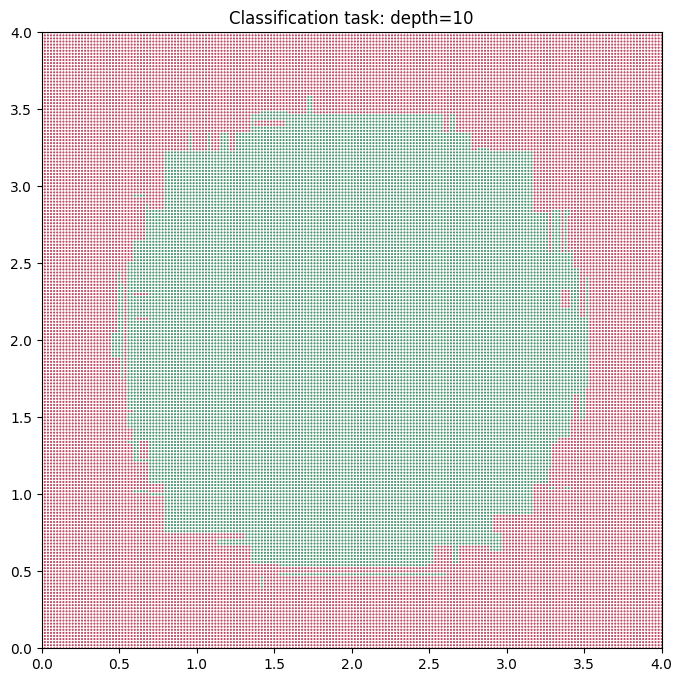

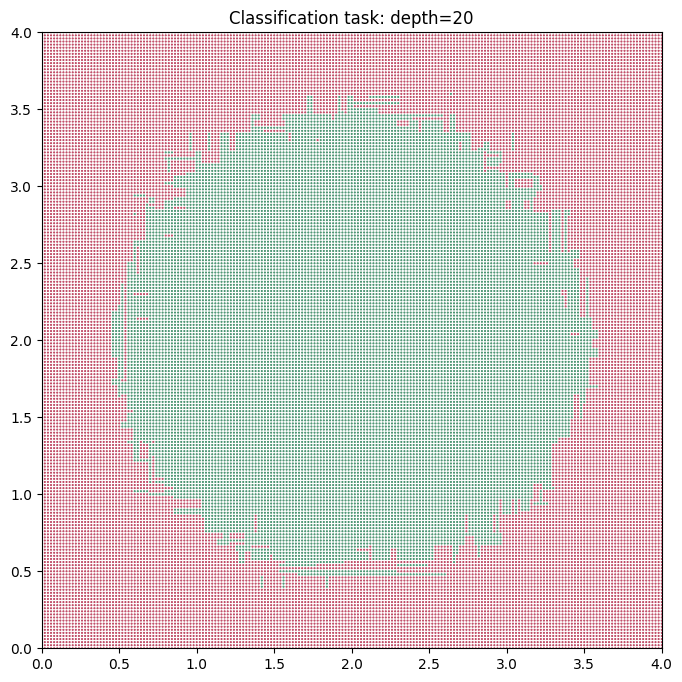

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

depths = [3, 5, 10, 20]

h = 0.02
x_min, x_max = -0.1, 4.1
y_min, y_max = -0.1, 4.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


X, y = make_circles(n_samples=100000, noise=0.1, factor=0.5, random_state=42)
X = (X + 1) * 2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

for ax, depth in zip(axes, depths):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.scatter(xx, yy, c=Z, cmap="RdYlGn", alpha=0.8, s=1, marker=".")
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.title(f"Classification task: {depth=}")
    plt.show()


# Titanic

Here, we'll be using the Titanic dataset.